# INTRODUCTION
<br>
Klasifikasi penyakit jantung menggunakan beberapa metode machine learning algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

## Read Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rrayhka/klasifikasi-penyakit-jantung/main/heart.csv")

In [3]:
# data lima pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data contains; <br>

* age - umur pasien <br>
* sex - (1 = laki-laki; 0 = perempuan) <br>
* cp - tipe penyakit dada <br>
* trestbps - tekanan darah (dalam mm Hg saat masuk rumah sakit) <br>
* chol - kolesterol serum dalam mg/dl <br>
* fbs - (Glukosa > 120 mg/dl) (1 = benar; 0 = salah) <br>
* restecg - Hasil Elektrokardiografi <br>
* thalach - detak jantung maksimal <br>
* exang - agina karena olahraga (1 = benar; 0 = salah) <br>
* oldpeak - depresi yang disebabkan karena keseringan olahraga daripada istirahat <br>
* slope - kemiringian latihan ST segment <br>
* ca - jumlah pembuluh darah besar (0-3) yang diwarnai dengan flourosopy <br>
* thal - biasa; 6 = cacat tetap; 7 = cacat yang dapat dibalik <br>
* target - memiliki penyakit jantung atau tidak (1=benar, 0=salah)

## Data Exploration

In [4]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<ipython-input-5-64d5be856ef3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="bwr")


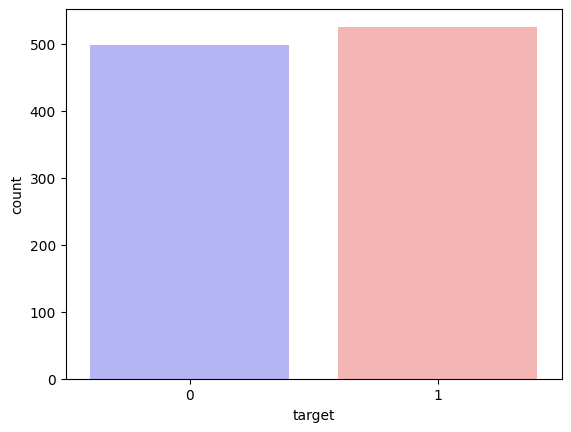

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
print(f"Presentasi pasien yang memiliki penyakit jantung: {round(len(df[df.target == 1]) / (len(df.target))*100, 2)}%")
print(f"Presentasi pasien yang tidak memiliki penyakit jantung: {round(len(df[df.target == 0]) / (len(df.target))*100, 2)}%")

Presentasi pasien yang memiliki penyakit jantung: 51.32%
Presentasi pasien yang tidak memiliki penyakit jantung: 48.68%


<ipython-input-7-6bf0107b12f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="mako_r")


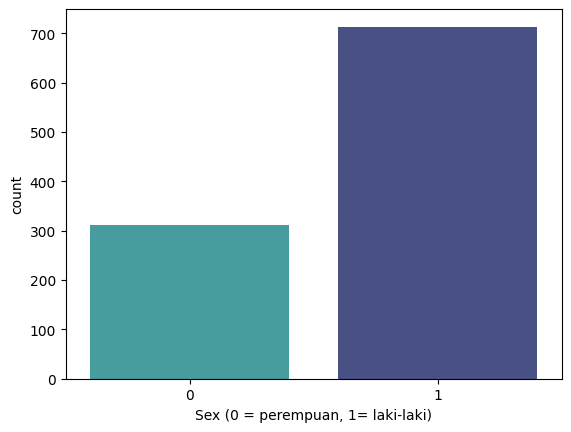

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = perempuan, 1= laki-laki)")
plt.show()

In [8]:
print(f"Presentasi pasien perempuan: {round(len(df[df.sex == 0]) / (len(df.sex))*100, 2)}%")
print(f"Presentasi pasien laki-laki: {round(len(df[df.sex == 1]) / (len(df.sex))*100, 2)}%")

Presentasi pasien perempuan: 30.44%
Presentasi pasien laki-laki: 69.56%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


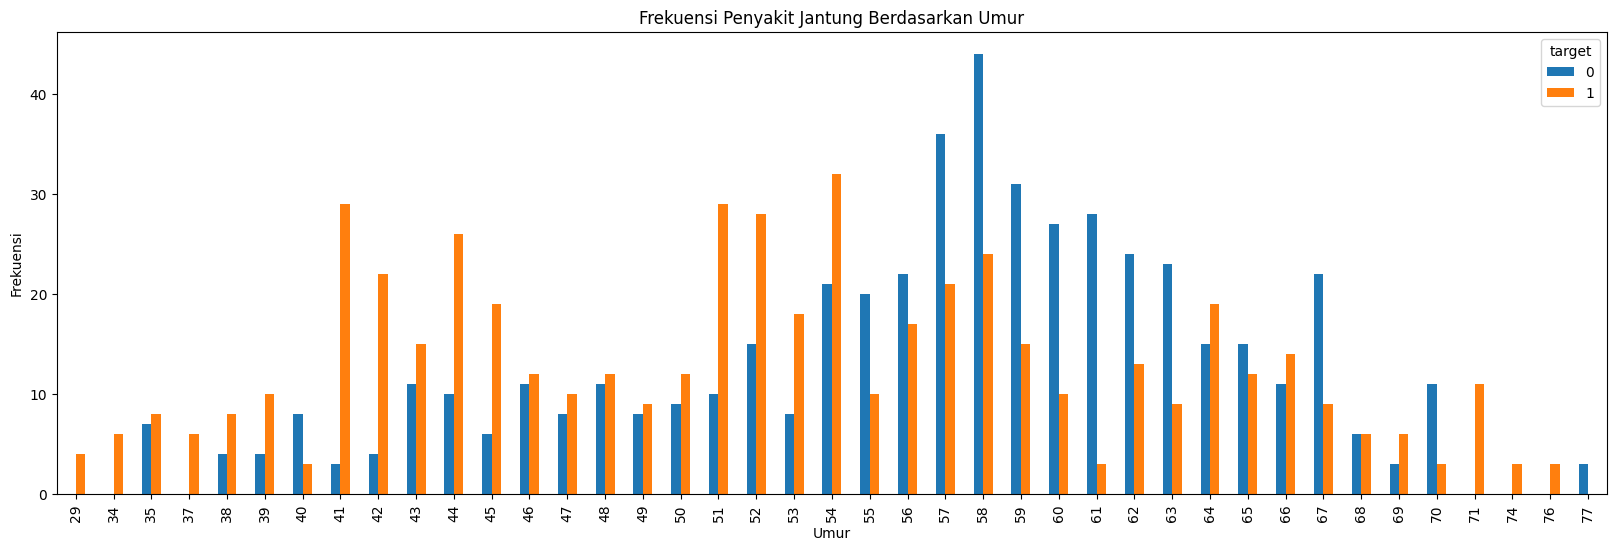

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Penyakit Jantung Berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

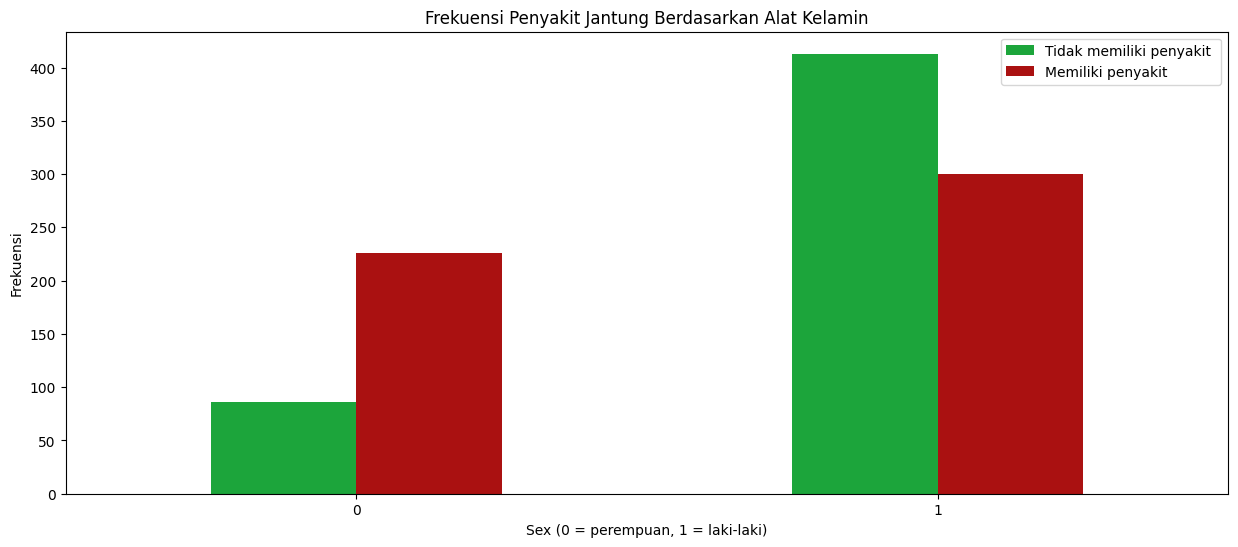

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi Penyakit Jantung Berdasarkan Alat Kelamin')
plt.xlabel('Sex (0 = perempuan, 1 = laki-laki)')
plt.xticks(rotation=0)
plt.legend(["Tidak memiliki penyakit ", "Memiliki penyakit"])
plt.ylabel('Frekuensi')
plt.show()

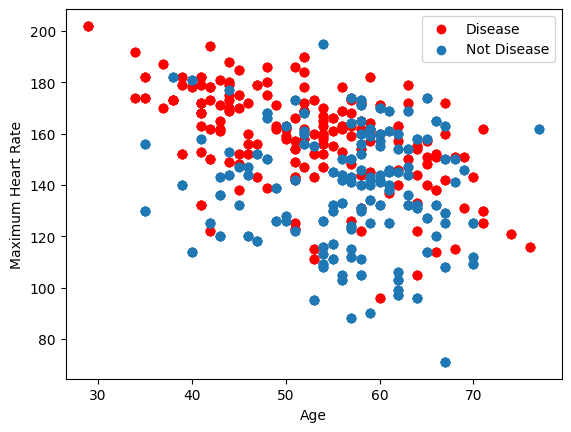

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

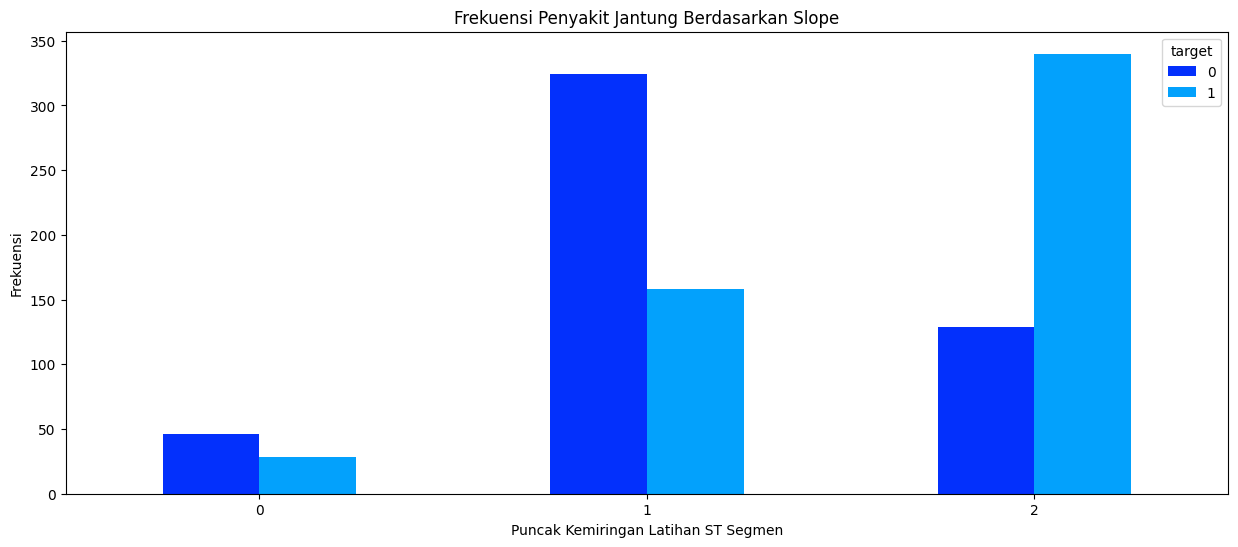

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#0330fc','#03a1fc' ])
plt.title('Frekuensi Penyakit Jantung Berdasarkan Slope')
plt.xlabel('Puncak Kemiringan Latihan ST Segmen')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi')
plt.show()

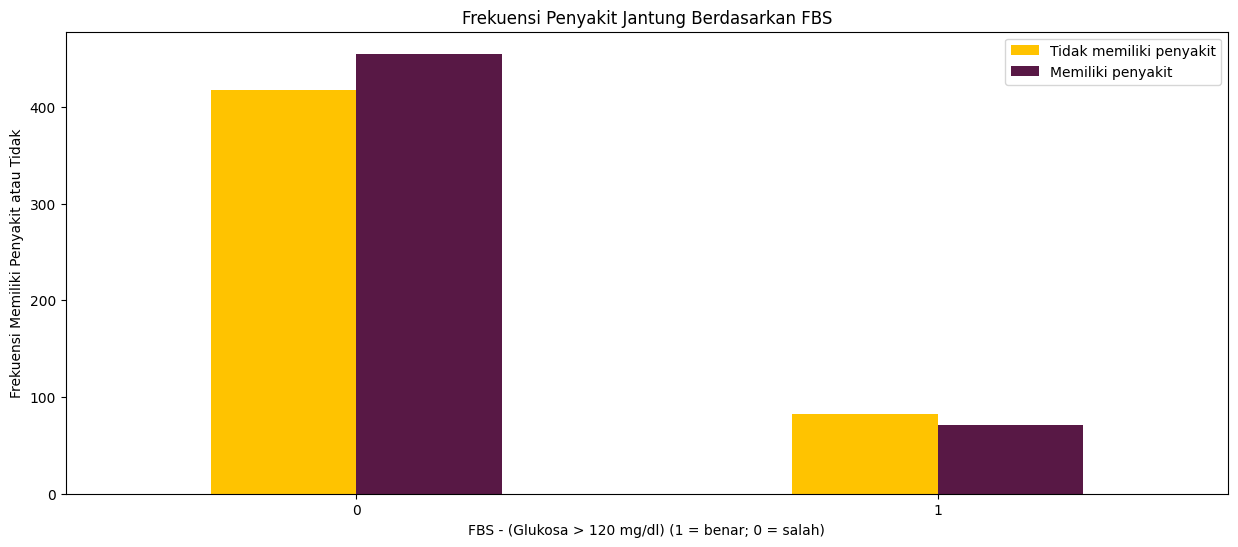

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Penyakit Jantung Berdasarkan FBS')
plt.xlabel('FBS - (Glukosa > 120 mg/dl) (1 = benar; 0 = salah)')
plt.xticks(rotation = 0)
plt.legend(["Tidak memiliki penyakit", "Memiliki penyakit"])
plt.ylabel('Frekuensi Memiliki Penyakit atau Tidak')
plt.show()

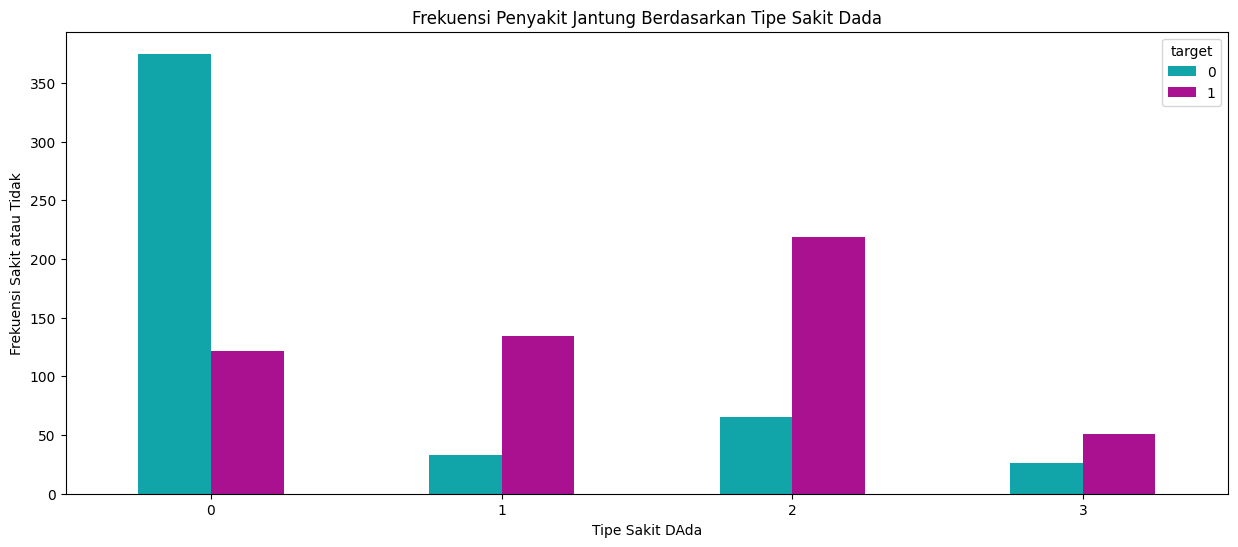

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Frekuensi Penyakit Jantung Berdasarkan Tipe Sakit Dada')
plt.xlabel('Tipe Sakit DAda')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi Sakit atau Tidak')
plt.show()

### Membuat Dummy Variable

Dikarenakan 'cp', 'thal', 'slope' adalah kategorikal maka akan diubah ke numerik dengan menggunakan pandas dummies

In [16]:
a = pd.get_dummies(df['cp'], prefix = "cp", dtype=int)
b = pd.get_dummies(df['thal'], prefix = "thal", dtype=int)
c = pd.get_dummies(df['slope'], prefix = "slope", dtype=int)

In [17]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [18]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


## Membuat Model untuk Logistik Regression

Membuat function manual lalu menggunakan dari libraray sklearn

In [19]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [20]:
# Normalisasi Data
x = (x_data - x_data.min()) / (x_data.max() - x_data.min()).values

Split data 70% dan 30% untuk testing

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [22]:
# Transpose Matriks
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Katakanlah bobot = 0.1 and bias = 1

In [23]:
#initialize
def initialize(dimension):

    weight = np.full((dimension,1),0.1)
    bias = 1
    return weight,bias

### Sigmoid Function

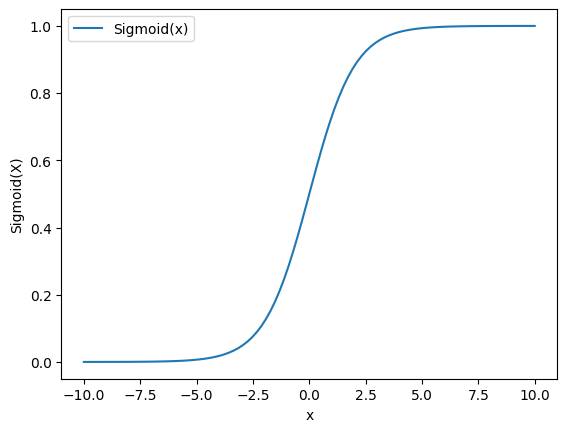

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.plot(x, z, label='Sigmoid(x)')
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.legend()

In [25]:
def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head

### Forward and Backward Propagation
<br>
<img src="https://image.slidesharecdn.com/gradientdescentbackpropandautomaticdifferentiation-160829164205/95/gradient-descent-back-propagation-and-auto-differentiation-advanced-spark-and-tensorflow-meetup-08042016-62-638.jpg?cb=1472489358" width="500px"/>

### Cost Function
<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

### Gradient Descent
<br>
<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>


* h0(x^i)= y_head
* y^i = y_train
* x^i = x_train

In [26]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward

    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost,gradients

In [27]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [28]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [29]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)

    print(f"Manuel Test Accuracy: {round(100 - np.mean(np.abs(y_prediction - y_test))*100, 2)}%")

iteration: 100
cost: 0.3480481337459761


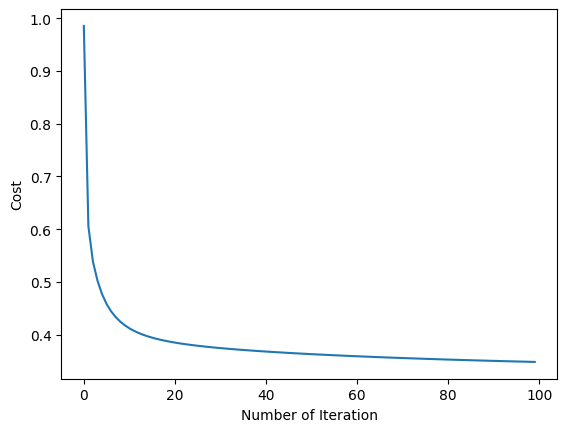

Manuel Test Accuracy: 83.77%


In [30]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

## <font color="orange">Manuel Test Accuracy is <font color="red">**83.77%**</font></font><br>
Mari coba menggunakan sklearn library.

### Sklearn Logistic Regression

In [31]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print(f"Test Accuracy {round(acc, 2)}%")

Test Accuracy 80.19%


1. ## <font color = "orange">Model akurasi <font color="red">**80.19%**</font> accuracy.</font>

## K-Nearest Neighbour (KNN) Classification

**KNN Algorithm**
<br>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png"/>

In [32]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print(f"{2} NN Score: {round(knn.score(x_test.T, y_test.T)*100, 2)}%")

2 NN Score: 97.4%


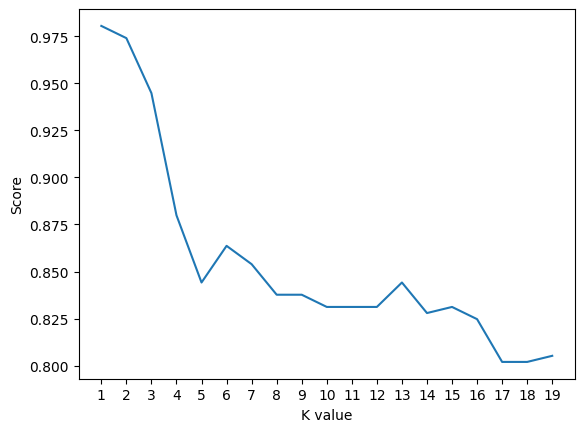

Maximum KNN Score is 98.05%


In [33]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Terlihat pada K ke-1 adalah yang paling tinggi, setelah itu mengalamai penurunan <br>
## <font color="orange">Model KNN Akurasi <font color="red">98.05%</font></font>

## Support Vector Machine (SVM) Algorithm

**Support Vector Machine Algorithm**
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg" width="500px"/><br>
<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg" width="500px"/>


In [34]:
from sklearn.svm import SVC

In [35]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print(f"Test Akurasi SVM: {round(acc, 2)}%")

Test Akurasi SVM: 86.04%


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 86.04%</font></font>

## Naive Bayes Algorithm

**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print(f"Akurasi Naive Bayes {round(acc, 2)}%")

Akurasi Naive Bayes 71.43%


## <font color="orange">Akurasi Naive Bayes: <font color="red">71.43%</font></font>

## Decision Tree Algorithm

In [39]:
from sklearn import tree
!apt-get -qq install -y graphviz && pip install -q graphviz
import graphviz
clf = tree.DecisionTreeClassifier()

In [40]:
x_reshaped = x.reshape(-1, 1)
y_subset = y[:100]
clf = clf.fit(x_reshaped, y_subset)

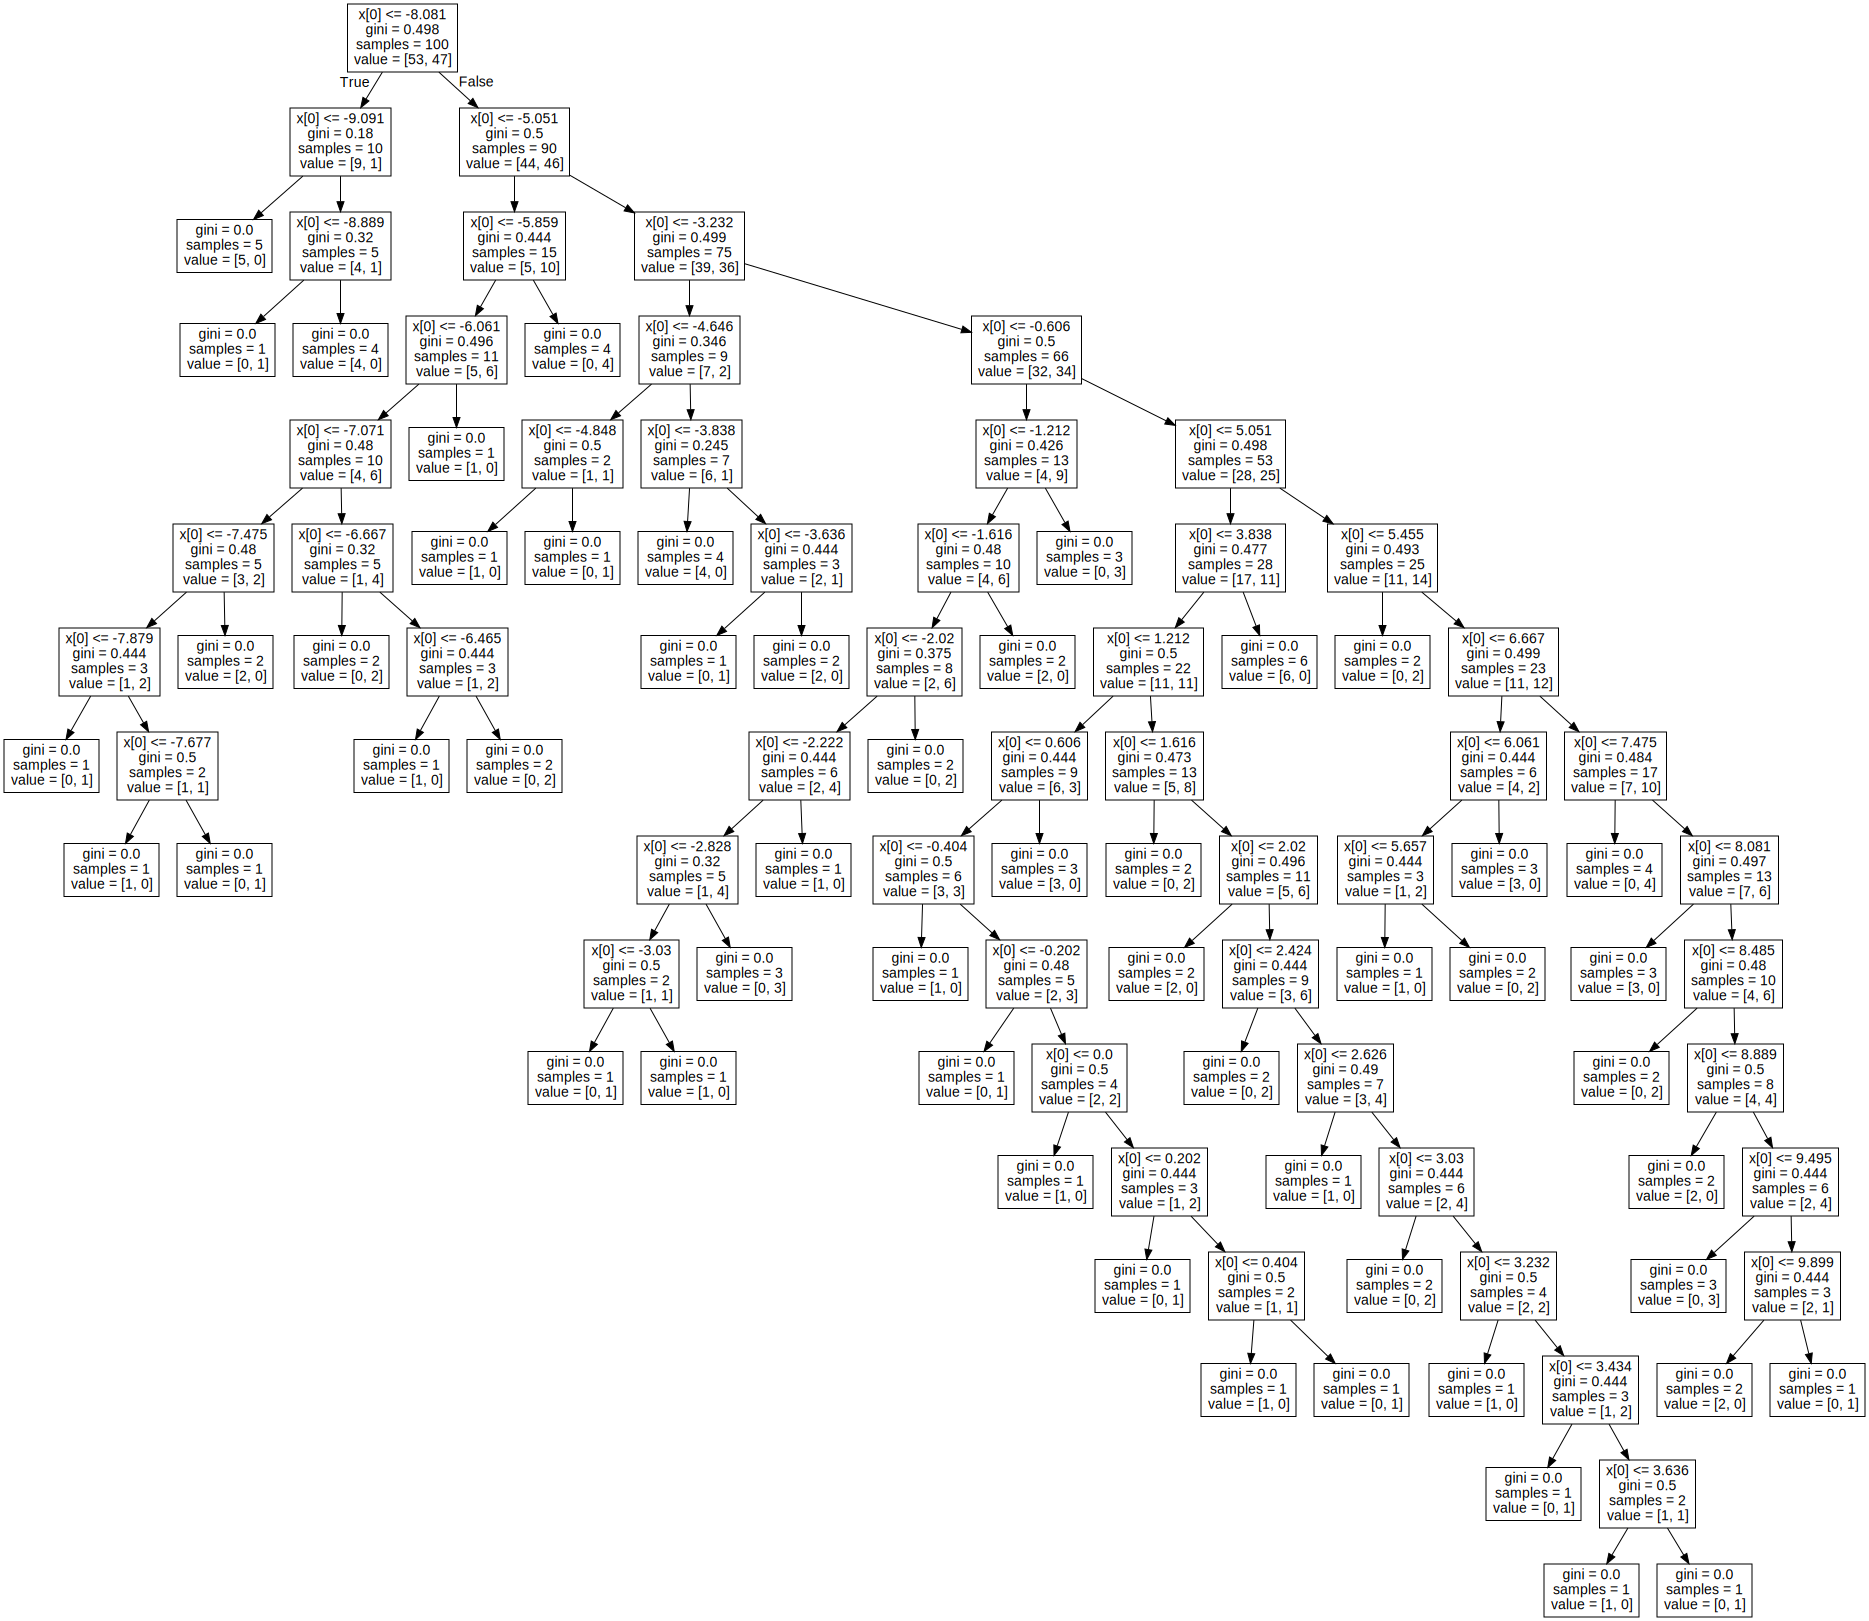

In [41]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print(f"Akurasi Decision Tree Test {round(acc, 2)}%")

Akurasi Decision Tree Test 97.08%


## <font color="#CFC60E">Akurasi Algoritma Decision Tree: <font color="red">97.08%</font></font>

## Random Forest Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print(f"Akurasi Random Forest: {round(acc, 2)}%")

Akurasi Random Forest: 98.05%


## <font color="orange">Akurasi Random Forest: <font color="red">98.05%</font></font>

## Membandingkan Models

<ipython-input-45-77a5d6d6930b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


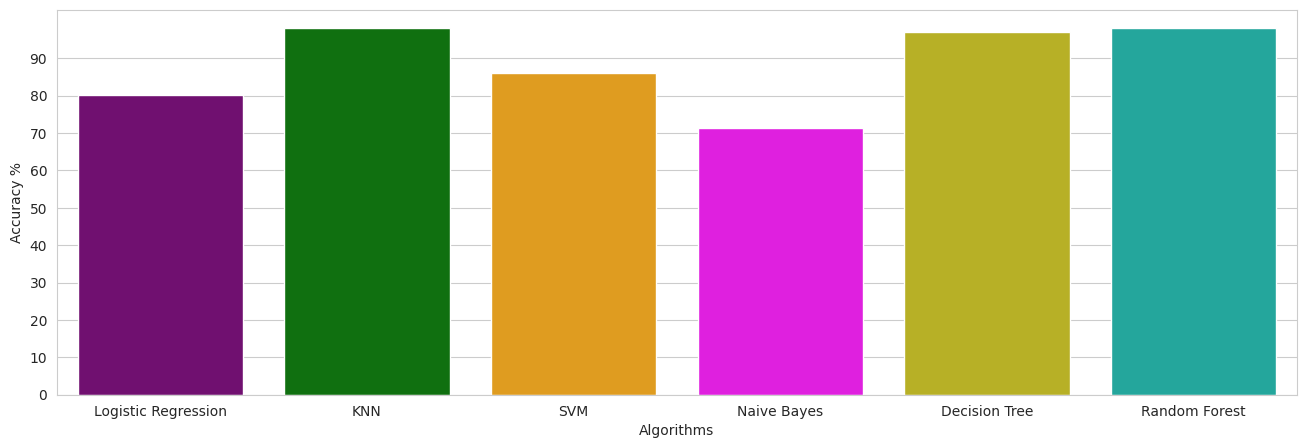

In [45]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Di dapat kesimpulan bahwasanya model yang paling bagus adalah KNN dan random forest

## Confusion Matrix

In [46]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [47]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


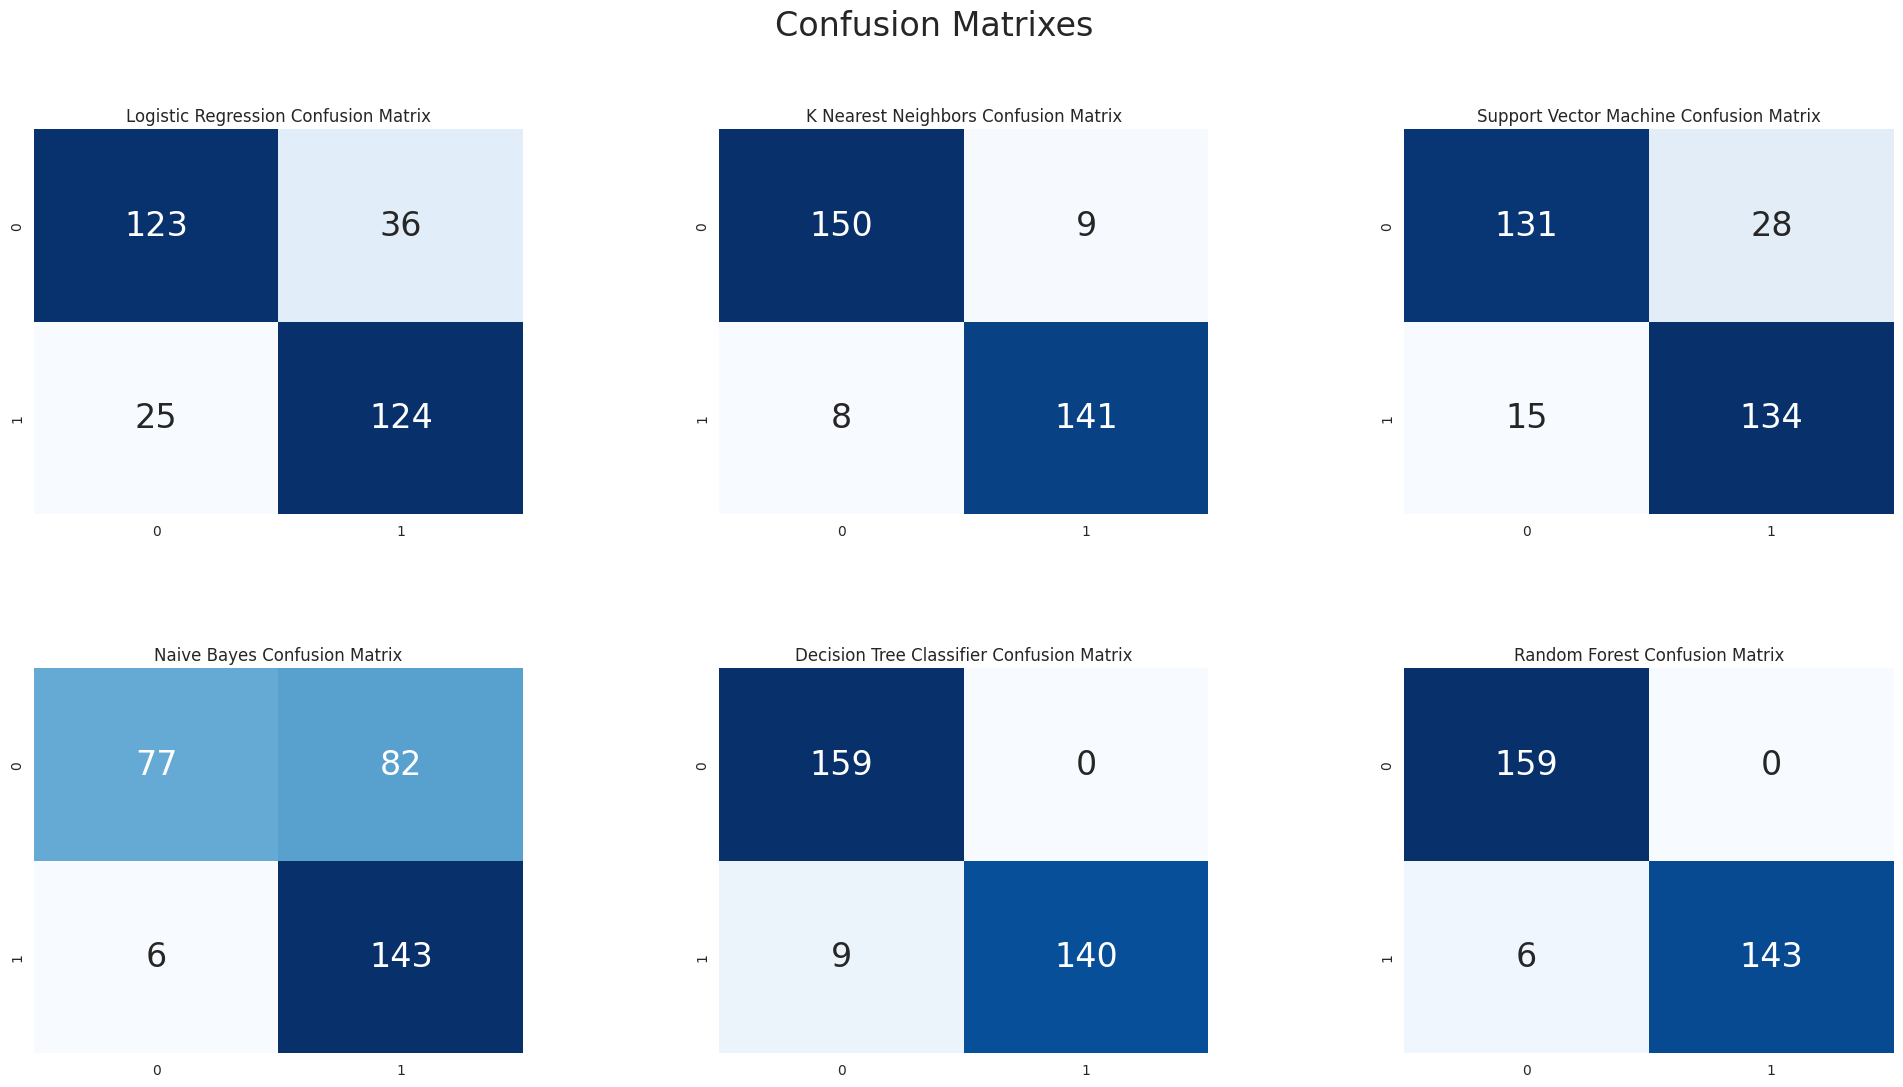

In [48]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()